<a href="https://colab.research.google.com/github/MatDawit/Startup-Success-Predictor.github.io/blob/jackie-ver/first3featurestartuppredictormodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Random Forest Classification Model**

`Goal`: successfully predict closed (0) or still operating (1) status

In [12]:
import pandas as pd

# importing the dataset
from google.colab import files
uploaded = files.upload()

dataset = pd.read_csv('df.csv')

Saving df.csv to df (1).csv


In [13]:
# importing more libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [14]:
# frequency coding category_list
def frequency_encode(dataset, column_name):
    freq = dataset[column_name].value_counts()
    dataset[column_name + '_freq'] = dataset[column_name].map(freq)
    return dataset

# Apply to desired columns
dataset = frequency_encode(dataset, 'category_list')

By frequency encoding category_list, that changes categorical data to a numeric representation of how often the category appears in the dataset.

Numeric data is easier for machine learning models to work with.

In [18]:
# selecting features (x) and the target (y)
input = ['category_list_freq', 'country_code', 'funding_rounds']
x = dataset[input].copy()
y = dataset['status']

# converting country_code to a numerical format using one hot encoding
x = pd.get_dummies(x, columns=['country_code'], prefix='country')

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Converted country_code to one hot encoding (converting categories to new category columns, then assigning 0 or 1 to those columns) to allow for the model to be able to utilize those features to predict accurately.

Binary data is easier for machine learning models to work with.

Selecting only 3 of 10  possible features to improve user accessibility and simplify the model's display. These 3 features are also the most important, overall, this adjustment keeps the model accurate and usable.

In [19]:
# making the random forest classification model
# there are 100 trees in this random forest to ensure the model classifies with the most information possible
# and 42 as the random state to ensure reproductability of results
model = RandomForestClassifier(n_estimators=100, random_state=42)

# training the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# using test data to predict
modelpredict = model.predict(X_test)

In [21]:
modelpredict

array([1, 1, 1, ..., 1, 1, 1])

Classification:

`Failed (0)`: closed

`Successful (1)`: ipo, acquired, operating

In [22]:
print("Accuracy:", accuracy_score(y_test, modelpredict))
print("Confusion Matrix:\n", confusion_matrix(y_test, modelpredict))
print("Classification Report:\n", classification_report(y_test, modelpredict))

Accuracy: 0.9231876861966236
Confusion Matrix:
 [[   33  1361]
 [  186 18560]]
Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.02      0.04      1394
           1       0.93      0.99      0.96     18746

    accuracy                           0.92     20140
   macro avg       0.54      0.51      0.50     20140
weighted avg       0.88      0.92      0.90     20140



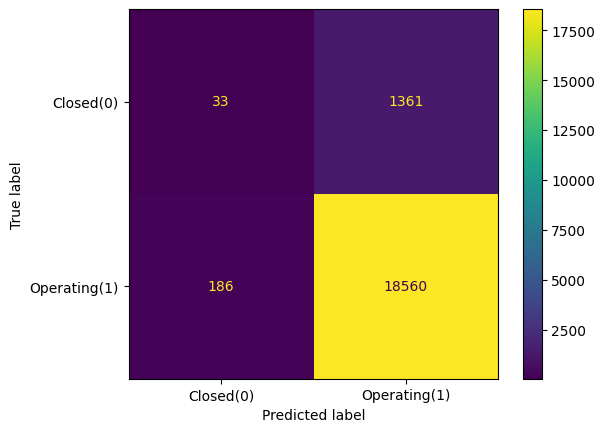

In [23]:
# visualizing accuracy
cm_visualization = ConfusionMatrixDisplay(confusion_matrix(y_test, modelpredict), display_labels=['Closed(0)', 'Operating(1)'])
cm_visualization.plot()

The model in its current state is incapable of predicting closed startups.